# **. Import Libraries:**

In [185]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
import copy


In [186]:
C = 1.0
n_splits = 5
output_file = f'model_C={C}.bin'


# **. Load Dataset:**

In [187]:
df = pd.read_csv('heart.csv')


# **. Data Exploration:**

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


All Colimns are Numeric type

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Statics shows the count of each column along with their mean value, standard deviation, minimum and maximum values.

Display first 5 rows of the dataset

In [190]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Checking Missing Value**

In [191]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No column has any missing value

There only Binary Classification (0 and 1)

# Heat Map and importance of features
## 

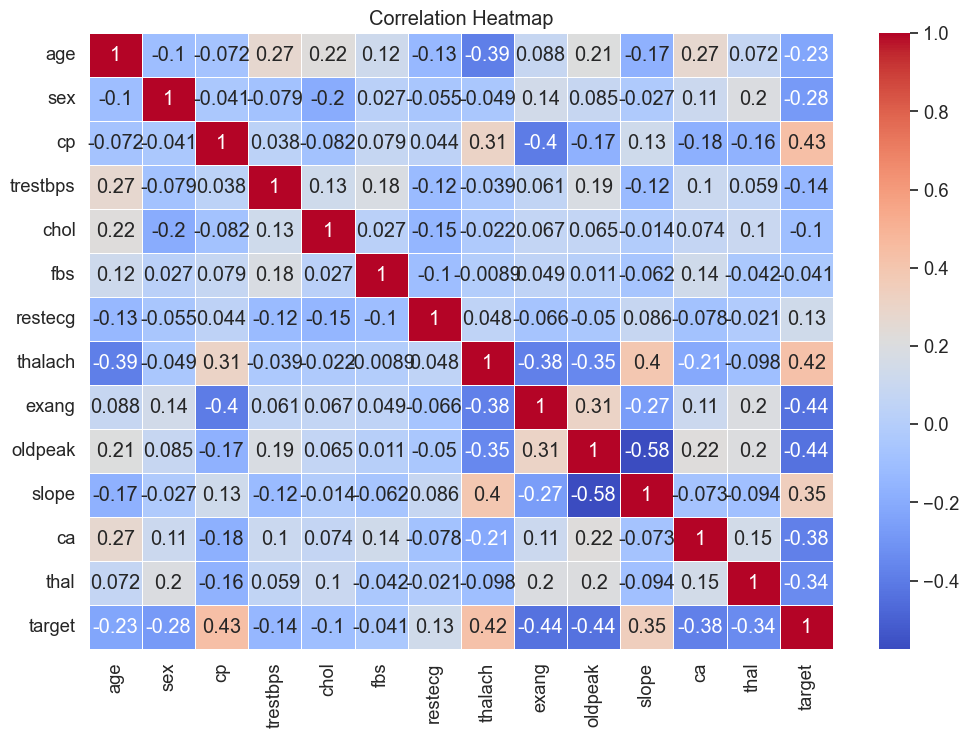

In [192]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

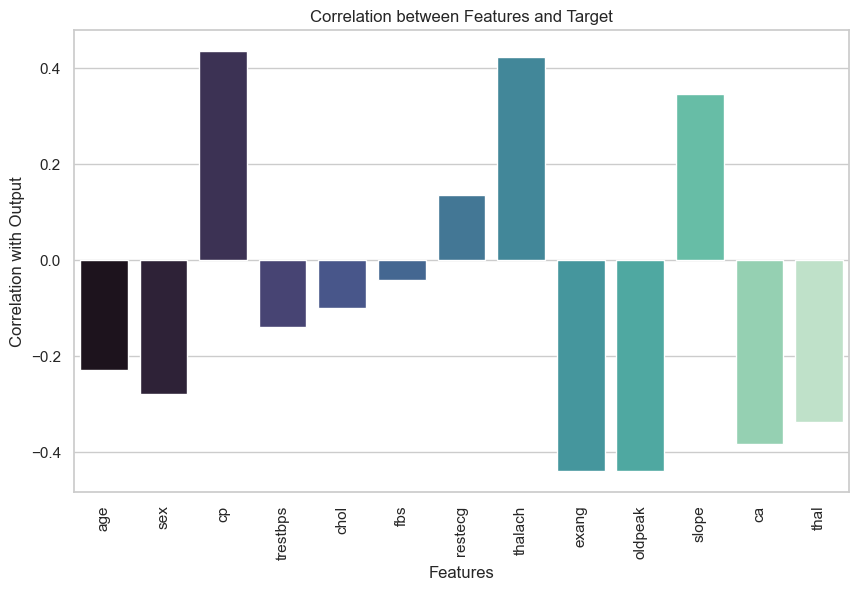

In [193]:
# Calculate the correlation coefficients between features and the label 'output'
correlation_with_output = df.corr()['target'].drop('target')

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_output.index, y=correlation_with_output.values, palette="mako")

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Correlation with Output")
plt.title("Correlation between Features and Target")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# **Plot chances of heart attack**

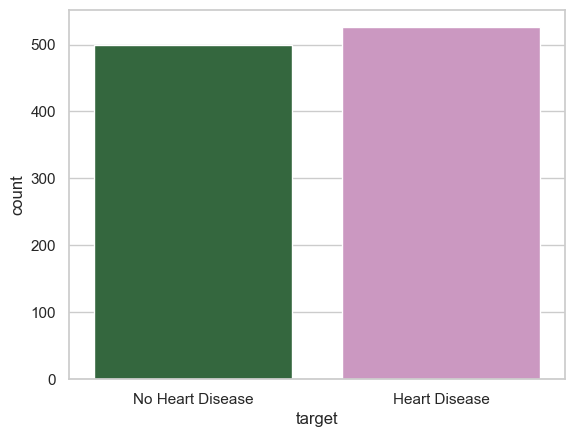

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


1    526
0    499
Name: target, dtype: int64

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x="target", data=df, palette="cubehelix")

# Calculate the number of occurrences for each category
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

# Set labels for the columns
ax.set_xticklabels(["No Heart Disease", "Heart Disease"])

# Show the plot
plt.show()

# Rest of your code
df.target.value_counts()
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / len(df.target)) * 100))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / len(df.target)) * 100))
df.target.value_counts()


# **Check gender distribution for the study**

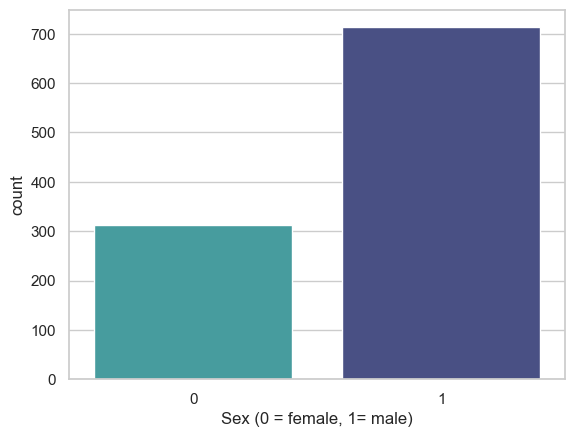

1    713
0    312
Name: sex, dtype: int64

In [195]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
df.sex.value_counts()

# Correlation between sex and target

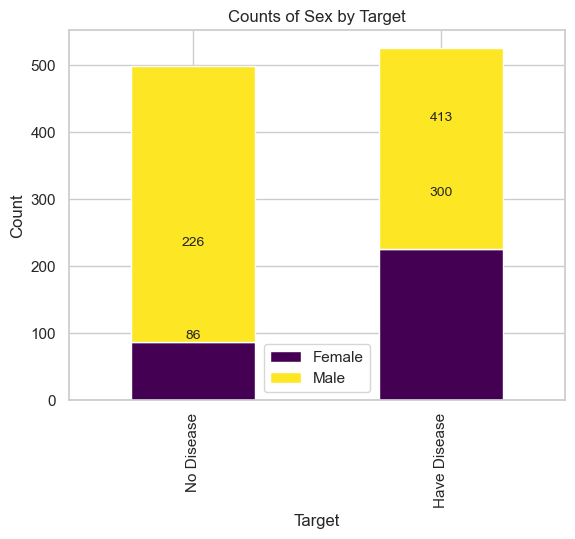

In [196]:
# Group and count data
grouped = df.groupby('target')['sex'].value_counts()

# Convert grouped data to a DataFrame for easy plotting
grouped_df = grouped.unstack()

# Map target labels
target_mapping = {0: "No Disease", 1: "Have Disease"}
grouped_df.index = grouped_df.index.map(target_mapping)

# Plotting using Seaborn
sns.set(style="whitegrid")
ax = grouped_df.plot(kind="bar", stacked=True, colormap="viridis")

# Adding labels and title
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Counts of Sex by Target")

# Adding annotations for each bar
for i, col in enumerate(grouped_df.columns):
    for j, value in enumerate(grouped_df[col]):
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Modify the legend labels
plt.legend(["Female", "Male"])

# Display the plot
plt.show()


# Heart Desease VS Age

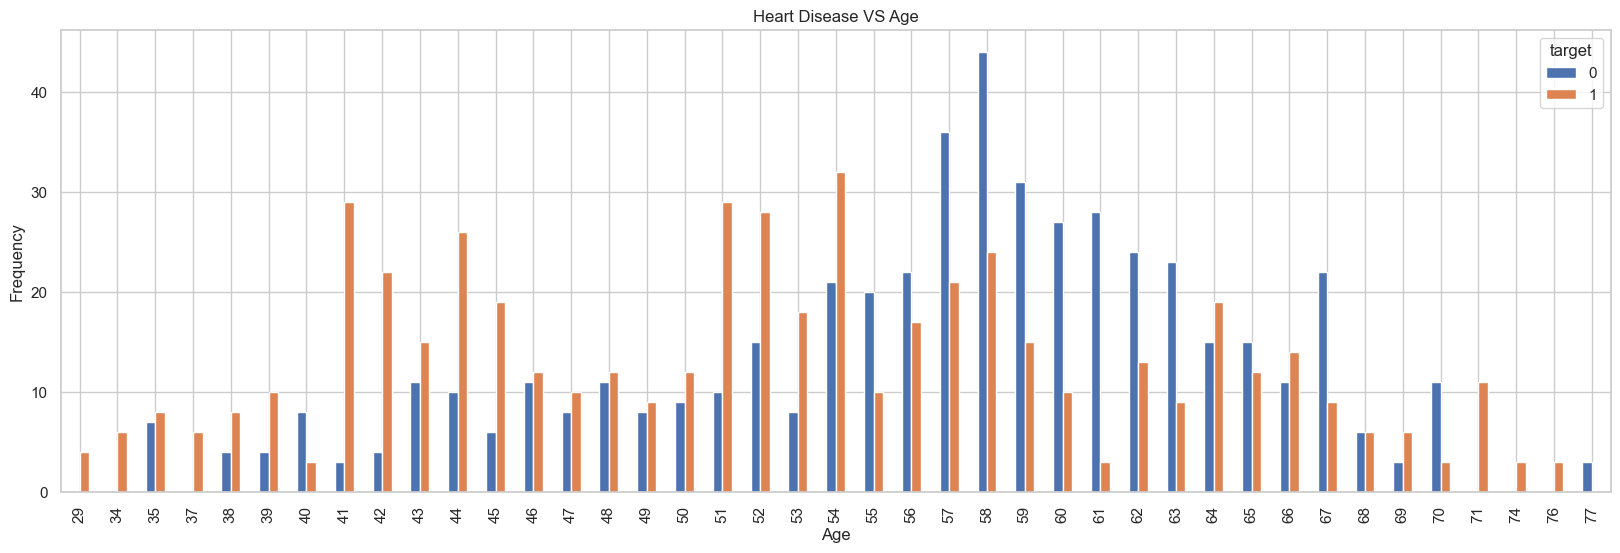

In [197]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease VS Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Correlation between SLP and output**

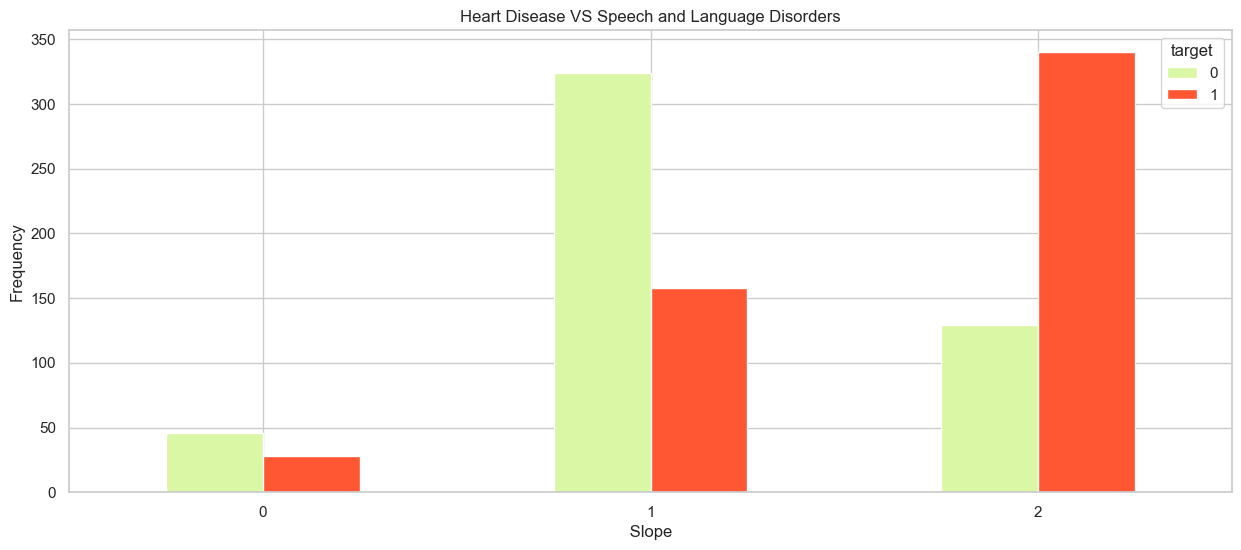

In [198]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease VS Speech and Language Disorders')
plt.xlabel(' Slope ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


# **Correlation between FBS and output bold text**

<function matplotlib.pyplot.show(close=None, block=None)>

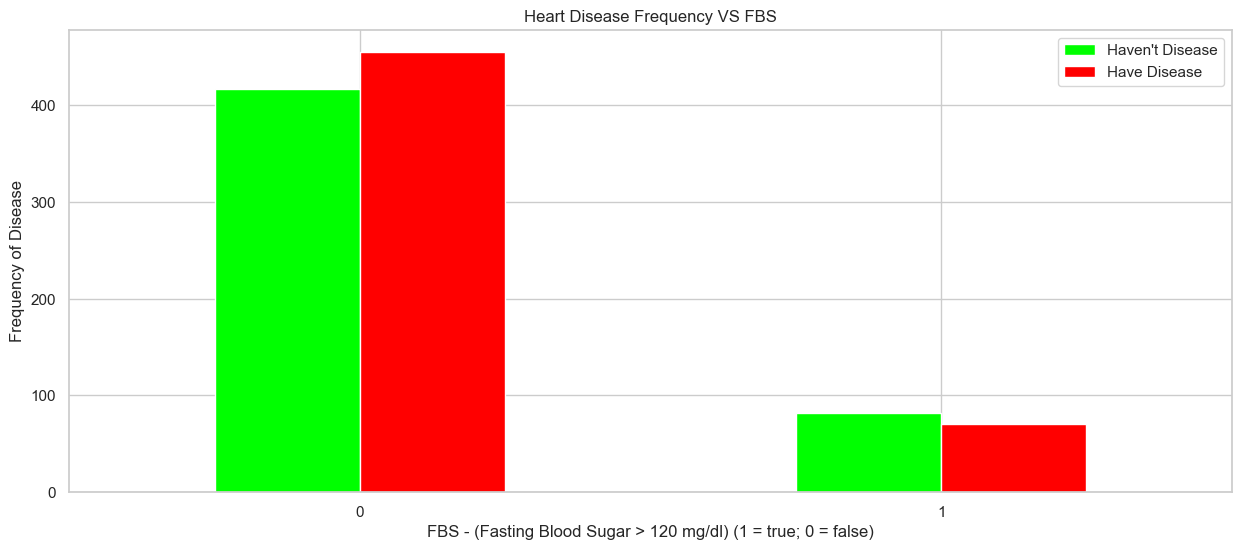

In [199]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#00FF00','#FF0000' ])
plt.title('Heart Disease Frequency VS FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease')
plt.show

# **Correlation between Chest pain type and output**

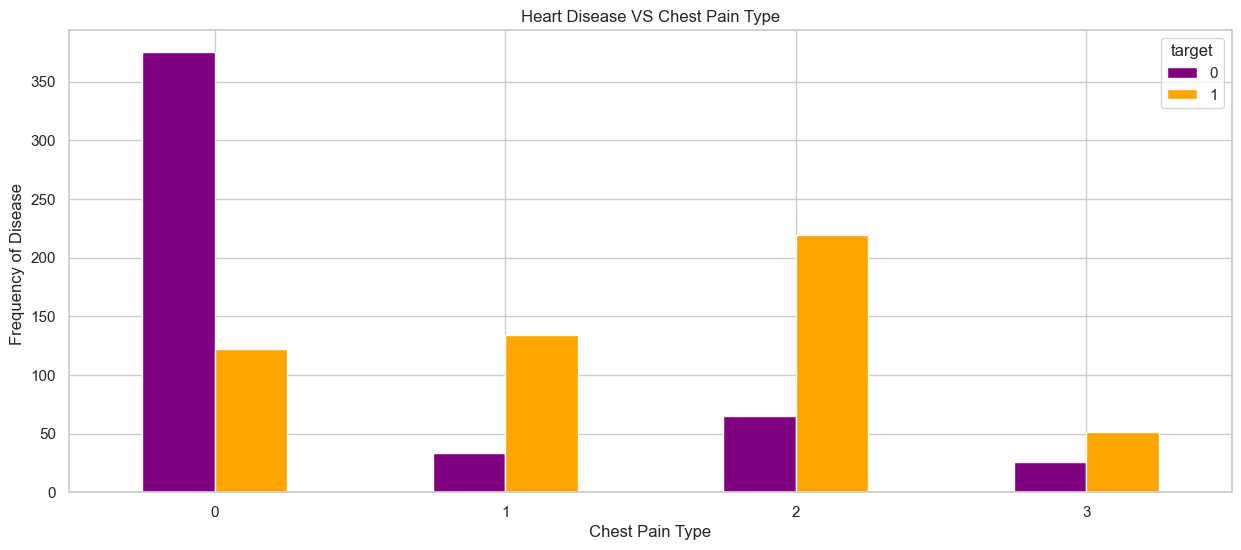

In [200]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#800080','#FFA500' ])
plt.title('Heart Disease VS Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease ')
plt.show()

Calculating and Sorting Correlations with Target Variable in a DataFrame

In [201]:
correlation_df = df.corrwith(df['target']).to_frame('correlation')

# Sort the DataFrame by the 'correlation' column in descending order
correlation_df_sorted = correlation_df.sort_values(by='correlation', ascending=False)

# Display the sorted DataFrame
print(correlation_df_sorted)

          correlation
target       1.000000
cp           0.434854
thalach      0.422895
slope        0.345512
restecg      0.134468
fbs         -0.041164
chol        -0.099966
trestbps    -0.138772
age         -0.229324
sex         -0.279501
thal        -0.337838
ca          -0.382085
exang       -0.438029
oldpeak     -0.438441


## Split data as 60%  will be train data and 20% will be Data_Validation and 20% test data.

In [202]:
from sklearn.model_selection import train_test_split


In [203]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [204]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [205]:

len(df_train),len(df_val),len(df_test),len(df_train_full)


(615, 205, 205, 820)

In [206]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

In [207]:
del df_train['target']
del df_val['target']
del df_test['target']

In [208]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [209]:
numerical = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [210]:
len(y_train),len(y_val),len(y_test)

(615, 205, 205)

##  Train Logestic Regression

In [211]:
from sklearn.linear_model import LogisticRegression


In [212]:

model = LogisticRegression(solver='liblinear', random_state=1)


In [213]:
X_train = df_train
X_val = df_val
X_test = df_test



In [214]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,52,1,0,112,230,0,1,160,0,0.0,2,1,2
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3
790,54,1,0,110,239,0,1,126,1,2.8,1,1,3
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [215]:
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [216]:

model.predict_proba(X_val)

array([[1.71002828e-01, 8.28997172e-01],
       [5.33989867e-02, 9.46601013e-01],
       [3.27561710e-01, 6.72438290e-01],
       [1.03343090e-01, 8.96656910e-01],
       [2.77344268e-01, 7.22655732e-01],
       [5.94319215e-01, 4.05680785e-01],
       [9.94603692e-01, 5.39630843e-03],
       [2.96879754e-01, 7.03120246e-01],
       [9.72019797e-01, 2.79802032e-02],
       [2.77788363e-01, 7.22211637e-01],
       [6.81828433e-01, 3.18171567e-01],
       [9.33799210e-01, 6.62007898e-02],
       [9.63077860e-01, 3.69221402e-02],
       [4.21596413e-01, 5.78403587e-01],
       [2.90156786e-01, 7.09843214e-01],
       [9.92920047e-01, 7.07995260e-03],
       [3.19663519e-01, 6.80336481e-01],
       [9.51934122e-01, 4.80658778e-02],
       [7.56922846e-01, 2.43077154e-01],
       [9.93557146e-01, 6.44285422e-03],
       [7.83978752e-02, 9.21602125e-01],
       [9.86859988e-01, 1.31400122e-02],
       [2.70882719e-02, 9.72911728e-01],
       [1.61418662e-02, 9.83858134e-01],
       [7.839787

In [217]:
y_pred = model.predict_proba(X_val)[:, 1]

In [218]:
target = y_pred > 0.55



In [219]:
(y_val == target).mean()

0.8439024390243902

### AUC for Data Validation

In [220]:
y_pred = model.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_pred)
auc

0.8938499619192689

### AUC for Data test

In [221]:
y_pred_LR_test = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_LR_test)
auc

0.9161888379204893

### Train Logestic Regression

In [222]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.493
0.05 0.707
0.10 0.746
0.15 0.737
0.20 0.771
0.25 0.800
0.30 0.805
0.35 0.800
0.40 0.800
0.45 0.800
0.50 0.820
0.55 0.844
0.60 0.834
0.65 0.834
0.70 0.800
0.75 0.766
0.80 0.732
0.85 0.673
0.90 0.644
0.95 0.600
1.00 0.507


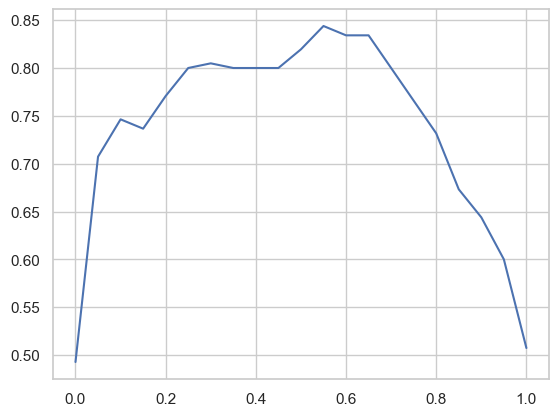

In [223]:
plt.plot(thresholds, scores)

### Hyper parameter tunin usining Cross Validation

### Define Train and Predict functions

In [224]:
def train1(df_train, y_train, C=1.0):
    X_train= df_train[numerical]
    
    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train, y_train)
    
    return  model

In [225]:
def predict1(df,model):
    X = df[numerical]

    #X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred



In [226]:
from tqdm.auto import tqdm

In [227]:
from sklearn.model_selection import KFold

In [228]:
len(df_train),len( y_train) , len(df_val),len(y_val)

(615, 615, 205, 205)

In [229]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.target.values
        y_val = df_val.target.values

        model = train1(df_train, y_train, C=C)
        y_pred = predict1(df_val, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.799 +- 0.023
C=0.01 0.888 +- 0.024
C=0.1 0.915 +- 0.028
C=0.5 0.917 +- 0.027
C=1 0.917 +- 0.027
C=5 0.917 +- 0.026
C=10 0.917 +- 0.026


In [230]:
scores

[0.9101190476190476,
 0.8755980861244018,
 0.9268514311676511,
 0.9150803093396788,
 0.9564114046872668]

### Train final model for logestic regression

In [231]:
model = train1(df_train, y_train, C=10.0)
y_pred_LR = predict1(df_val, model)

auc = roc_auc_score(y_val, y_pred_LR)
auc

0.9564114046872668

In [232]:
len(df_test),len(y_test)

(205, 205)

In [233]:
model = train1(df_train, y_train, C=10.0)
y_pred_LR = predict1(df_test, model)

auc = roc_auc_score(y_test, y_pred_LR)
auc

0.9241207951070336

## Prepare Data for Deceion tree

In [234]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [235]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [236]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

In [237]:

del df_train['target']
del df_val['target']
del df_test['target']


In [238]:
len(df_train), len(df_val) ,len(df_test) , len(y_train), len(y_val) ,len(y_test)

(615, 205, 205, 615, 205, 205)

In [239]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [240]:
X_train= df_train
X_val=df_val
X_test=df_test




## Train the Decision Tree classifier

In [241]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)



DecisionTreeClassifier()

In [242]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [243]:
y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.9851485148514851

In [244]:
y_pred = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.96875

## Prepare Data for Random Forest

In [245]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [246]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [247]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

In [248]:

del df_train['target']
del df_val['target']
del df_test['target']

In [249]:
X_train= df_train
X_val=df_val
X_test=df_test

## Random Forest Classifier Before tuning

In [250]:
rf = RandomForestClassifier(n_estimators=1, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.9319782939832444

In [251]:
y_pred_rf_test = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_val, y_pred_rf_test)

0.5120906321401371

## Tuning parameters

### Number of estimators required (Number of trees)

In [252]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.984
20 -> 0.987
30 -> 0.989
40 -> 0.990
50 -> 0.989
60 -> 0.991
70 -> 0.989
80 -> 0.988
90 -> 0.991
100 -> 0.989
110 -> 0.989
120 -> 0.989
130 -> 0.990
140 -> 0.989
150 -> 0.988
160 -> 0.988
170 -> 0.988
180 -> 0.988
190 -> 0.988
200 -> 0.988


#### n_estimator =60 is the best value

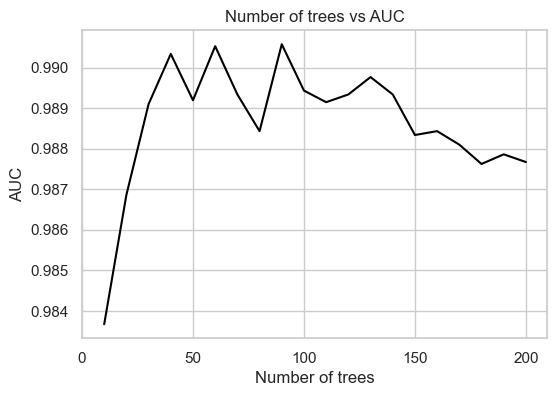

In [253]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

### Tuninig the max_depth parameter:

In [254]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.946
20 -> 0.946
30 -> 0.947
40 -> 0.948
50 -> 0.949
60 -> 0.950
70 -> 0.953
80 -> 0.955
90 -> 0.955
100 -> 0.956
110 -> 0.958
120 -> 0.958
130 -> 0.957
140 -> 0.957
150 -> 0.958
160 -> 0.958
170 -> 0.958
180 -> 0.957
190 -> 0.958
200 -> 0.958

depth: 10
10 -> 0.971
20 -> 0.986
30 -> 0.982
40 -> 0.984
50 -> 0.983
60 -> 0.983
70 -> 0.986
80 -> 0.987
90 -> 0.986
100 -> 0.987
110 -> 0.987
120 -> 0.985
130 -> 0.986
140 -> 0.989
150 -> 0.988
160 -> 0.989
170 -> 0.988
180 -> 0.988
190 -> 0.988
200 -> 0.988

depth: 20
10 -> 0.972
20 -> 0.986
30 -> 0.983
40 -> 0.982
50 -> 0.981
60 -> 0.981
70 -> 0.984
80 -> 0.986
90 -> 0.986
100 -> 0.985
110 -> 0.986
120 -> 0.985
130 -> 0.985
140 -> 0.986
150 -> 0.986
160 -> 0.987
170 -> 0.987
180 -> 0.987
190 -> 0.987
200 -> 0.987



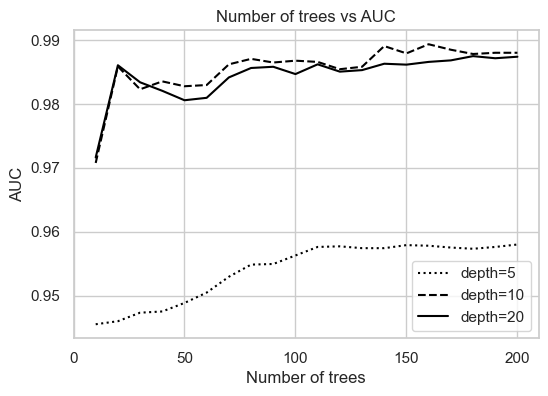

In [255]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

### Tuning the min_samples_leaf parameter

In [256]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.970
20 -> 0.977
30 -> 0.976
40 -> 0.978
50 -> 0.977
60 -> 0.978
70 -> 0.978
80 -> 0.978
90 -> 0.977
100 -> 0.980
110 -> 0.980
120 -> 0.981
130 -> 0.979
140 -> 0.979
150 -> 0.979
160 -> 0.979
170 -> 0.978
180 -> 0.978
190 -> 0.978
200 -> 0.978

min_samples_leaf: 5
10 -> 0.950
20 -> 0.959
30 -> 0.958
40 -> 0.961
50 -> 0.962
60 -> 0.960
70 -> 0.963
80 -> 0.962
90 -> 0.964
100 -> 0.965
110 -> 0.962
120 -> 0.963
130 -> 0.963
140 -> 0.962
150 -> 0.962
160 -> 0.963
170 -> 0.963
180 -> 0.963
190 -> 0.963
200 -> 0.963

min_samples_leaf: 10
10 -> 0.928
20 -> 0.937
30 -> 0.936
40 -> 0.940
50 -> 0.942
60 -> 0.944
70 -> 0.947
80 -> 0.947
90 -> 0.948
100 -> 0.948
110 -> 0.948
120 -> 0.948
130 -> 0.947
140 -> 0.947
150 -> 0.947
160 -> 0.946
170 -> 0.947
180 -> 0.946
190 -> 0.948
200 -> 0.948



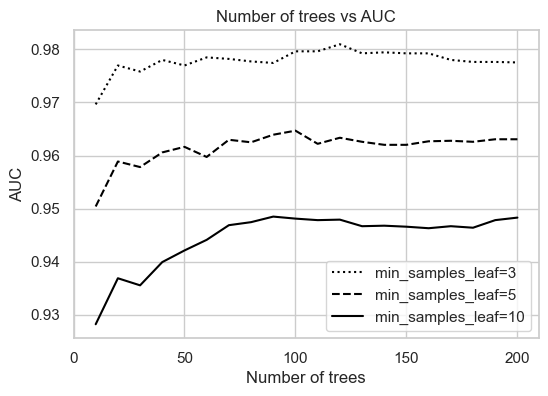

In [257]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

### Training the final model:

In [258]:
rf_final = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=3, random_state=1)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=10,
                       random_state=1)

In [259]:
y_pred_rf = rf_final.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.9383568164508759

In [260]:
y_pred_rf_test = rf_final.predict_proba(X_test)[:, 1]
roc_auc_score(y_val, y_pred_rf_test)

0.49662033511043413

In [261]:
from sklearn.metrics import roc_curve

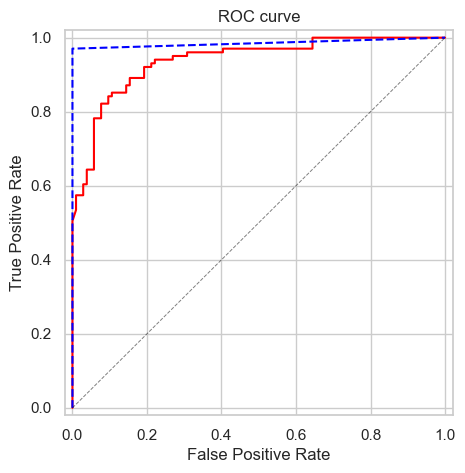

In [262]:
plt.figure(figsize=(5, 5))


fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='red')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='blue', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## XGBoost

In [263]:
import xgboost as xgb

In [264]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=None)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=None)

In [265]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [266]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [267]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.9663086 , 0.974263  , 0.7207517 , 0.89524716, 0.85660905,
       0.05802355, 0.04098863, 0.9348767 , 0.715223  , 0.94249237],
      dtype=float32)

In [268]:
roc_auc_score(y_val, y_pred)

0.983054074638233

In [269]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [270]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [271]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                 num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [272]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [273]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

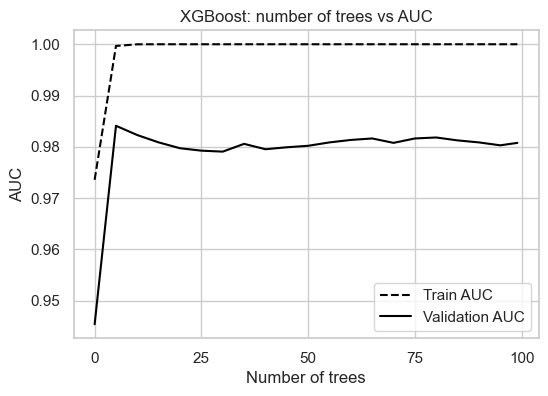

In [274]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))


plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

In [275]:
len(df_train) , len(y_test)


(615, 205)

In [276]:
 #training the final model

print('training the final model')
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred)
auc

print(f'auc={auc}')


#Save the model

with open(output_file, 'wb') as f_out:
     pickle.dump((model), f_out)

print(f'the model is saved to {output_file}')


training the final model
auc=0.9791666666666667
the model is saved to model_C=1.0.bin


### A variety of models were leveraged in the training process, supplemented with rigorous hyperparameter tuning methodologies. The performance of these models was rigorously evaluated based on key metrics AUC (Area Under Curve) , it emerged that the Decesion tree model after second round of parameter tuning  outperformed as compared to other model as AUC reached 97%